<a href="https://colab.research.google.com/github/Samarthjainabout/YoloV8_xbar/blob/main/Sky130_ReRAM_Ngspice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install libtool libxaw7-dev bison flex > install_pre.log

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [77.5 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,659 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,715 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,906 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,893 kB]
G

In [2]:
PDK_HASH = 'fa87f8f4bbcc7255b6f0c0fb506960f531ae2392'
PDK_ROOT = '/root/.volare/volare/sky130/versions'
PDKPATH = f'{PDK_ROOT}/sky130B'
%env PDK_ROOT={PDK_ROOT}
%env PDKPATH={PDKPATH}
!pip install --upgrade --no-cache-dir volare
!volare enable --pdk sky130 {PDK_HASH} > pdk_install.log

env: PDK_ROOT=/root/.volare/volare/sky130/versions
env: PDKPATH=/root/.volare/volare/sky130/versions/sky130B
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 5.8 MB/s eta 0:00:00


In [3]:
!git clone git://git.code.sf.net/p/ngspice/ngspice
!export PATH=$PATH:/content && cd ngspice && ./compile_linux.sh > ngspice_install.log 2>&1

Cloning into 'ngspice'...
remote: Enumerating objects: 134953, done.
remote: Counting objects: 100% (134953/134953), done.
remote: Compressing objects: 100% (24453/24453), done.
remote: Total 134953 (delta 109880), reused 134011 (delta 109172)
Receiving objects: 100% (134953/134953), 45.07 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (109880/109880), done.


In [4]:
%%writefile /root/.spiceinit
set num_threads=4
set ngbehavior=hsa
set ng_nomodcheck

Writing /root/.spiceinit


In [5]:
!git clone https://github.com/barakhoffer/sky130_ngspice_reram

Cloning into 'sky130_ngspice_reram'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 47 (delta 20), reused 28 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 32.31 KiB | 751.00 KiB/s, done.
Resolving deltas: 100% (20/20), done.


In [6]:
!sky130_ngspice_reram/install.sh

--2025-05-06 07:25:53--  https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_2_0_linux_amd64.tar.xz
Resolving openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)... 172.64.145.29, 104.18.42.227, 2606:4700:4400::6812:2ae3, ...
Connecting to openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)|172.64.145.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from openva.fra1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 23753116 (23M) [application/x-xz]
Saving to: ‘openvaf_23_2_0_linux_amd64.tar.xz’

openvaf_23_2_0_linu 100%[===================>]  22.65M   106MB/s    in 0.2s    

2025-05-06 07:25:53 (106 MB/s) - ‘openvaf_23_2_0_linux_amd64.tar.xz’ saved [23753116/23753116]

Cloning into 'sky130_fd_pr_reram'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 199 (

In [7]:
!pip install spyci

In [8]:
!ngspice -b -r reram_example.raw $PDK_ROOT/sky130B/libs.tech/ngspice/reram_example.spice


Note: Compatibility modes selected: hs a


Circuit: reram example

ASCII raw file "reram_example.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
No. of Data Columns : 6  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
te                                           0
xr0.nfilament                              3.8
v1#branch                                    0

 Reference value :  1.44705e-06
No. of Data Rows : 15030

Total analysis time (seconds) = 1.02262

Total elapsed time (seconds) = 1.030 

Total DRAM available = 12977.953 MB.
DRAM currently available = 4988.621 MB.
Maximum ngspice program size =  237.418 MB.
Current ngspice program size =   12.672 MB.

Shared ngspice pages =   10.766 MB.
Text (code) pages =    6.395 MB.
Stack = 0 bytes.
Library pages =   26.363 MB.



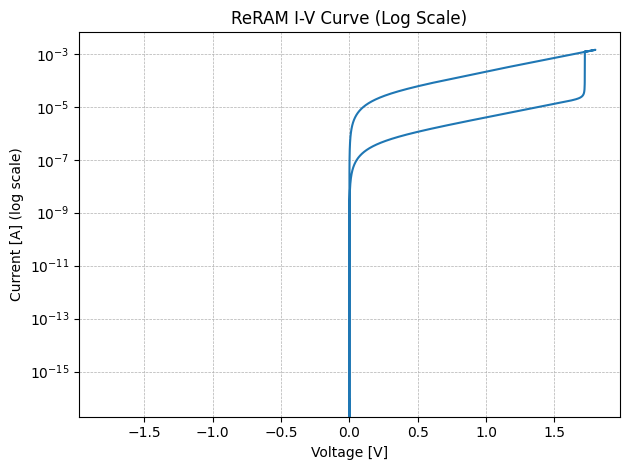

In [10]:
# voltage dynamics
import matplotlib.pyplot as plt

# Load and parse the raw file manually
def parse_ngspice_raw(filename):
    with open(filename, "r") as f:
        lines = f.readlines()

    num_points = int([line for line in lines if line.startswith("No. Points:")][0].split(":")[1])
    start_idx = lines.index("Values:\n") + 1
    values = lines[start_idx:]

    v_te = []
    i_v1 = []

    for i in range(num_points):
        base = i * 6
        v_te.append(float(values[base + 1]))
        i_v1.append(float(values[base + 3]))

    return v_te, i_v1

# Load data
v, i = parse_ngspice_raw("reram_example.raw")

# Plot
plt.plot(v, [-val for val in i])
plt.xlabel("Voltage [V]")
plt.ylabel("Current [A]")
plt.title("ReRAM I-V Curve")
plt.grid(True)
plt.tight_layout()
plt.show()


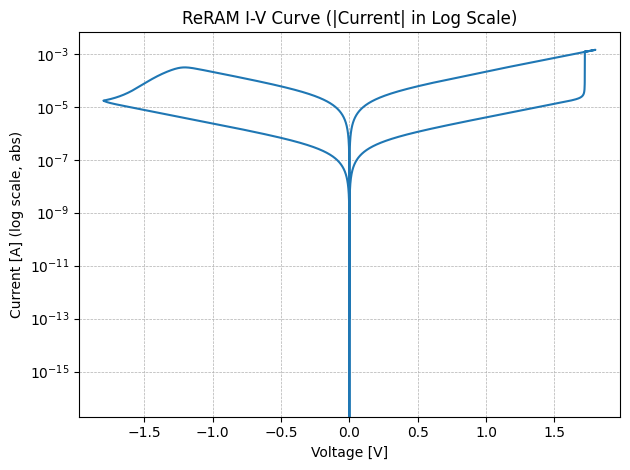

In [12]:
import matplotlib.pyplot as plt

# Load and parse the raw file manually
def parse_ngspice_raw(filename):
    with open(filename, "r") as f:
        lines = f.readlines()

    num_points = int([line for line in lines if line.startswith("No. Points:")][0].split(":")[1])
    start_idx = lines.index("Values:\n") + 1
    values = lines[start_idx:]

    v_te = []
    i_v1 = []

    for i in range(num_points):
        base = i * 6
        v_te.append(float(values[base + 1]))
        i_v1.append(float(values[base + 3]))

    return v_te, i_v1

# Load data
v, i = parse_ngspice_raw("reram_example.raw")

# Plot with log scale and absolute current
plt.plot(v, [abs(val) for val in i])
plt.yscale("log")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [A] (log scale, abs)")
plt.title("ReRAM I-V Curve (|Current| in Log Scale)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


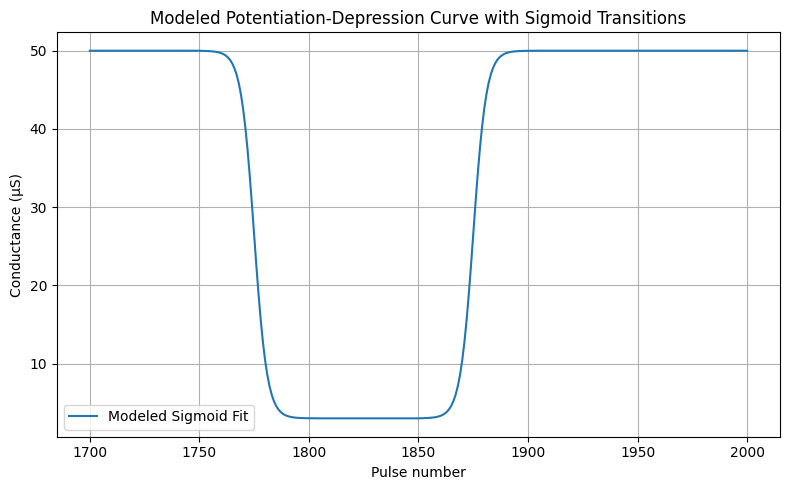

In [19]:
# Define pulse range
pulses = np.arange(1700, 2001)

# Define sigmoid parameters
k = 3  # controls slope steepness

# Initialize conductance array
conductance = np.zeros_like(pulses, dtype=float)

# Apply piecewise modeling
for i, p in enumerate(pulses):
    if 1700 <= p <= 1750:
        conductance[i] = 50
    elif 1750 < p <= 1800:
        conductance[i] = 47 / (1 + np.exp((p - 1775) / k)) + 3  # sigmoid drop
    elif 1800 < p <= 1850:
        conductance[i] = 3
    elif 1850 < p <= 1900:
        conductance[i] = 47 / (1 + np.exp(-(p - 1875) / k)) + 3  # sigmoid rise
    elif 1900 < p <= 2000:
        conductance[i] = 50

# Build DataFrame
df_model = pd.DataFrame({
    "Pulse number": pulses,
    "Conductance (uS)": conductance
})

# Plot the modeled potentiation-depression behavior
plt.figure(figsize=(8, 5))
plt.plot(df_model["Pulse number"], df_model["Conductance (uS)"], label='Modeled Sigmoid Fit')
plt.xlabel("Pulse number")
plt.ylabel("Conductance (µS)")
plt.title("Modeled Potentiation-Depression Curve with Sigmoid Transitions")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


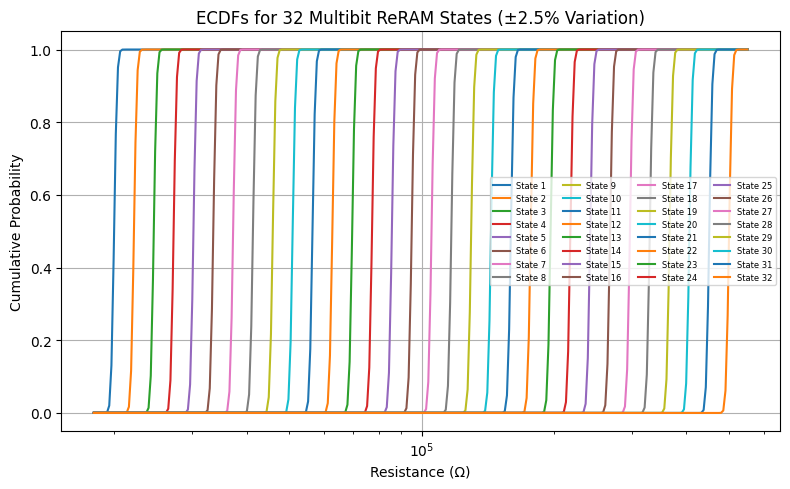

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Updated parameters
num_states = 32
R_min = 2e4        # 20 kΩ
R_max = 5e5        # 500 kΩ

# Log-scale spacing for state centers
log_R_min = np.log(R_min)
log_R_max = np.log(R_max)
delta_mu = (log_R_max - log_R_min) / (num_states - 1)

# Calculate sigma for ±2.5% variation
target_variation = 0.025  # ±2.5%
sigma = np.log(1 + target_variation) / 2  # ≈ 0.0123

# Resistance range for plotting
x = np.logspace(np.log10(R_min * 0.9), np.log10(R_max * 1.1), 300)

# Plot ECDFs
plt.figure(figsize=(8, 5))
for i in range(num_states):
    mu = log_R_min + i * delta_mu
    dist = lognorm(s=sigma, scale=np.exp(mu))
    cdf = dist.cdf(x)
    plt.plot(x, cdf, label=f"State {i+1}")

plt.xscale("log")
plt.xlabel("Resistance (Ω)")
plt.ylabel("Cumulative Probability")
plt.title("ECDFs for 32 Multibit ReRAM States (±2.5% Variation)")
plt.grid(True)
plt.legend(fontsize=6, ncol=4)
plt.tight_layout()
plt.show()


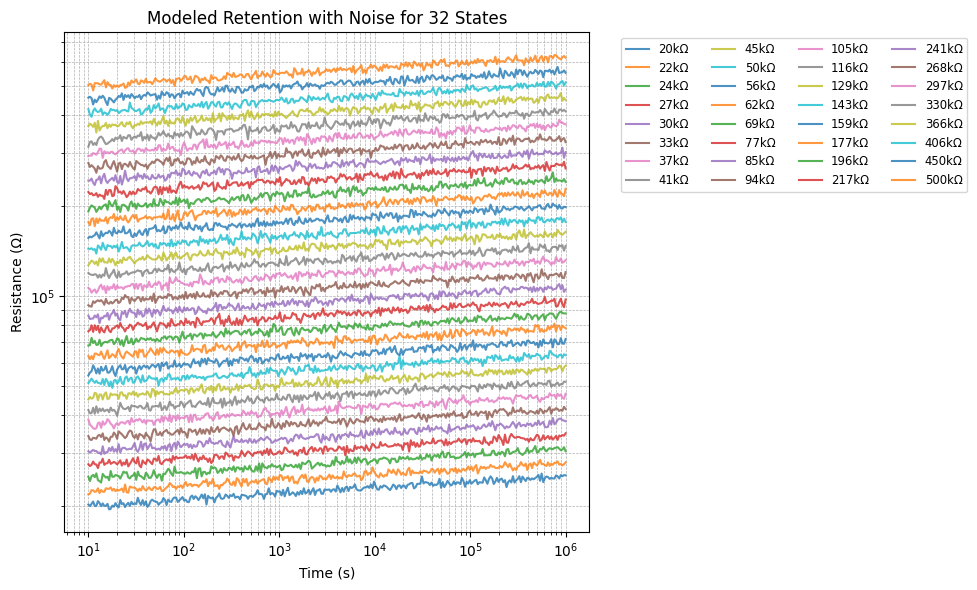

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Define resistance states (32 levels) ---
states = np.array([
    20000, 22188, 24616, 27310, 30298, 33613, 37291, 41371,
    45897, 50919, 56491, 62672, 69529, 77137, 85577, 94941,
    105329, 116854, 129639, 143824, 159561, 177020, 196389,
    217877, 241716, 268164, 297506, 330058, 366172, 406238,
    450687, 500000
])

# --- Define time range (log scale: 10s to 1M s) ---
time_vals = np.logspace(1, 6, num=300)  # 300 points from 10^1 to 10^6 seconds

# --- Model parameters ---
drift_factor = 0.05  # 5% drift over log(time)
noise_factor = 0.02  # 2% noise

# --- Generate retention data ---
records = []
np.random.seed(42)  # for reproducibility

for state in states:
    drift = state * (1 + drift_factor * np.log10(time_vals / time_vals[0]))
    noise = np.random.normal(0, state * noise_factor, size=len(time_vals))
    resistance = drift + noise
    for t, r in zip(time_vals, resistance):
        records.append({"Time (s)": t, "State (Ω)": state, "Resistance (Ω)": r})

df_retention = pd.DataFrame.from_records(records)

# --- Save to CSV ---
df_retention.to_csv("simulated_retention_model_32states.csv", index=False)

# --- Plot all curves ---
plt.figure(figsize=(10, 6))
for state in states:
    subset = df_retention[df_retention["State (Ω)"] == state]
    plt.plot(subset["Time (s)"], subset["Resistance (Ω)"], alpha=0.8, label=f"{int(state/1000)}kΩ")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Time (s)")
plt.ylabel("Resistance (Ω)")
plt.title("Modeled Retention with Noise for 32 States")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(ncol=4, fontsize="small", loc="upper left", bbox_to_anchor=(1.05, 1.0))
plt.tight_layout()
plt.show()
